## topic modeling

- 데이터가 많아야 좋다.
- 대규모 전자 텍스트에 숨어있는 공통적인 주제와 분별적 주제를 자동으로 탐색하여 텍스트를 식별하고, 이를 통해 텍스트의 정리, 요약, 검색에 활용할 수 있는 확률 모형
- 기계학습(machine learning), 자연어처리(natural language processing) 분야에서 정보검색, 문서분류, 문서요약 등에 주로 활용
- 사회과학 분야에서도 문서 분류, 주제 탐색 등으로 활용
- 가정과 원리
    - 하나의 주제는 여러 텍스트에서 공통적으로 높게 분포하는 하나 이상의 관련 어휘 목록으로 구성
    - 하나의 텍스트는 하나 이상의 주제로 구성되며, 주제별 분포 비율이 텍스트마다 차이
    - 또는 하나의 텍스트는 하나의 주제로 할당 모델도 있음
- topic이 어떠한가는, topic을 구성하는 어휘 목록을 봐야 알 수 있다.
- topic을 분류하고, 어떤 어휘 항목으로 이뤄져있나, 또 어떤 파일 목록들을 분류할 수 있나.
- 주제/문서 분류 등 다양하게 쓰일 수 있다.

## Python: 모듈
- Gensim:
    - 기능: 대규모 텍스트 코퍼스에서 주제 모델링(LDA, LSA 등) 및 의미론적 모델링
    - 장점: 대규모 데이터 처리
- Scikit-learn(sklearn):
    - 기능: 텍스트 처리를 위한 다양한 ML 알고리즘을 제공하며, NMF(Non-negative Matrix Factorization)나 LDA 구현
    - 장점: 일반적인 머신러닝 프레임워크와의 통합 용이, 다양한 전처리 기능.
- Top2Vec:
    - 기능: BERT 임베딩이나 Doc2Vec을 사용하여 문서 임베딩을 생성, 사전 학습 언어 모델 활용, 최신 라이브러리.
    - 장점: 복잡한 전처리 없이 최소한의 코드로 고품질 토픽 모델링, 빠름.
- BERTopic:
    - 기능: Hugging Face의 사전 학습된 언어 모델(BERT)과 UMAP, HDBSCAN을 결합. 최신 라이브러리.
    - 장점: 문맥을 이해하는 임베딩 기반, 높은 품질의 주제 추출

## 파일 불러오기 & 데이터프레임 변환

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import pandas as pd

# local
# texts = {i[:4]:open('./data/10_data/' + i, encoding='utf-8').read()
#             for i in sorted(os.listdir('./data/10_data/'))}

# colab
target_path = '/content/drive/MyDrive/Corpus/data/10_data/'
texts = {i[:4]:open(target_path + '/' + i, encoding='utf-8').read()
            for i in sorted(os.listdir(target_path))}
df = pd.DataFrame(texts, index=['docs']).T

In [16]:
df.shape

(56, 1)

In [17]:
df.head()

,docs
1789,Fellow-Citizens of the Senate and of the House...
1793,"Fellow citizens, I am again called upon by the..."
1797,"When it was first perceived, in early times, t..."
1801,Friends and Fellow Citizens:\n\nCalled upon to...
1805,"Proceeding, fellow citizens, to that qualifica..."


## topic modeling
- `+` 결과를 명확하게 볼 수 있다.
- file이 많아야 효과적이다.
- 내부적으로 샘플링을 계속 진행하기 때문에 시간이 좀 걸릴 수 있다.

In [19]:
!pip install top2vec

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 51.8 MB/s eta 0:00:00


In [20]:
from top2vec import Top2Vec

/usr/local/lib/python3.12/dist-packages/hdbscan/robust_single_linkage_.py:175: SyntaxWarning: invalid escape sequence '\{'
  $max \{ core_k(a), core_k(b), 1/\alpha d(a,b) \}$.


In [21]:
model = Top2Vec(df.docs.tolist(),
                embedding_model='universal-sentence-encoder')
# 한국어 텍스트: embedding_model='universal-sentence-encoder-multiingual'

2025-12-11 12:54:22,617 - top2vec - INFO - Pre-processing documents for training
INFO:top2vec:Pre-processing documents for training
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2025-12-11 12:54:24,821 - top2vec - INFO - Downloading universal-sentence-encoder model
INFO:top2vec:Downloading universal-sentence-encoder model
2025-12-11 12:55:34,624 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2025-12-11 12:55:39,813 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2025-12-11 12:56:22,772 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
/usr/local/lib/python3.12/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'en

In [22]:
model.get_num_topics()

2

In [23]:
# topic을 구성하는 문서의 수
topic_sizes, topic_nums = model.get_topic_sizes()

In [24]:
for topic_size, topic_num in zip(topic_sizes[:5], topic_nums[:5]):
    print(f"Topic Num {topic_num} has {topic_size} documents.")

Topic Num 0 has 33 documents.
Topic Num 1 has 23 documents.


## topic별 Top 50 어휘

- cosine similarity score에 대한 기준은 명확하게 없다.
- 상대적 관계를 봐야 한다.

In [25]:
topic_words, word_scores, topic_nums = model.get_topics()

In [26]:
topic_nums # 두 개의 topic이 나왔다.

array([0, 1])

In [27]:
for words, scores, num in zip(topic_words[:1],
                                word_scores[:1], topic_nums[:1]):
    print(f"Topic {num}")
    for word, score in zip(words, scores):
        print(word, score)

Topic 0
constitutional 0.21415359
citizens 0.1926994
republic 0.18873316
countrymen 0.16593885
democracy 0.15655157
constitution 0.15414035
citizen 0.14907882
nation 0.14790638
prosperity 0.12651452
against 0.121184
respect 0.1148725
honor 0.11267452
civil 0.11242233
equal 0.10932718
without 0.10818429
freedom 0.10760942
congress 0.10570522
powers 0.10358944
government 0.10180099
rights 0.10058287
liberty 0.10046585
principles 0.10019302
who 0.09678777
whose 0.09666337
ourselves 0.09154019
national 0.09063759
necessary 0.09035981
governments 0.08790125
shall 0.08727623
duty 0.085489094
states 0.085371286
principle 0.08413145
authority 0.082914524
nor 0.079430565
among 0.078820124
even 0.07734487
executive 0.07708661
each 0.07465212
free 0.074337825
administration 0.073754765
every 0.073029034
nations 0.07267358
under 0.07261697
both 0.07060638
laws 0.06985133
which 0.06877616
federal 0.06786265
called 0.06783871
between 0.06610503
of 0.06491628


`topic_words[:1]`
- `ndarray`의 차원을 유지하며 결합하기 위해 슬라이싱 사용

## topic별 어휘 목록

In [28]:
topic0 = pd.DataFrame({'Score':word_scores[0]},
                        index=topic_words[0])

In [29]:
topic0.head()

,Score
constitutional,0.214154
citizens,0.192699
republic,0.188733
countrymen,0.165939
democracy,0.156552


<Axes: >

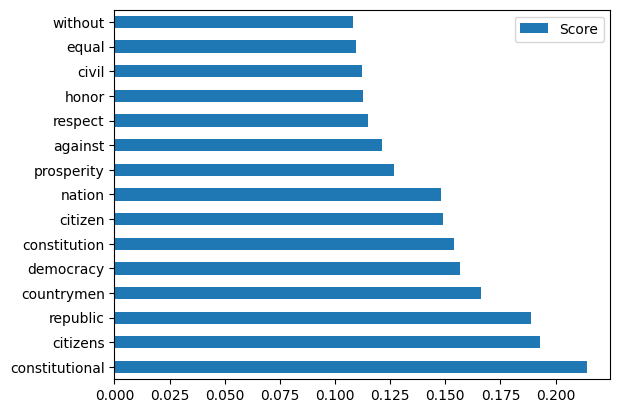

In [30]:
topic0[:15].plot(kind='barh')

- topic0은 어떤 주제일까?
    - 건국 초기에 나올 만한 용어가 많이 등장한다.

In [31]:
topic1 = pd.DataFrame({'Score':word_scores[1]},
                        index=topic_words[1])

In [32]:
topic1.head()

,Score
prosperity,0.180605
citizens,0.175274
nation,0.174942
freedom,0.167707
countrymen,0.167455


<Axes: >

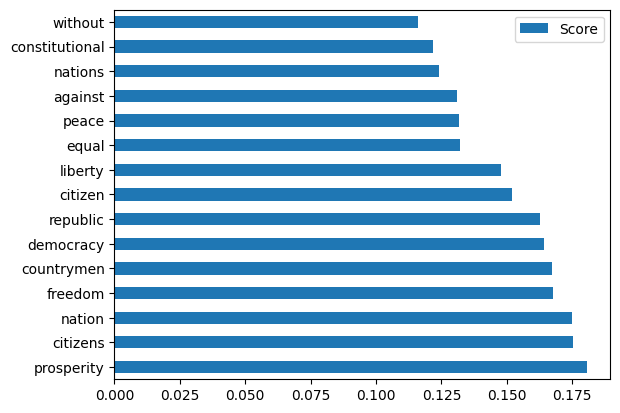

In [33]:
topic1[:15].plot(kind='barh')

- topic1은 어떤 주제일까?
    - topic0과 비슷한 단어도 있지만, 조합이 조금 다르다.
    - `constitutional`이 줄어들었다.
    - `peace, freedom`: '평화에 대해 얘기했구나'의 확신의 정도를 높일 수 있다.

## topic0: 문서 목록

In [34]:
documents, document_scores, document_ids = \
    model.search_documents_by_topic(topic_num=0, num_docs=topic_sizes[0])

In [35]:
document_scores

array([0.92637086, 0.916     , 0.91511023, 0.9144772 , 0.9139004 ,
       0.9128939 , 0.91250175, 0.9085198 , 0.90600616, 0.9047487 ,
       0.9028984 , 0.8985201 , 0.8973075 , 0.8961506 , 0.8928542 ,
       0.8901053 , 0.8889739 , 0.88884807, 0.88718975, 0.8860579 ,
       0.8831836 , 0.8815645 , 0.8755244 , 0.8731771 , 0.86143684,
       0.8494505 , 0.8378198 , 0.83641636, 0.82713234, 0.8256133 ,
       0.79837424, 0.71106493, 0.6399445 ], dtype=float32)

In [36]:
document_ids # 결과를 알기 어렵다.

array([25, 11,  7, 14, 17, 16, 23, 12, 10, 27, 26, 22,  9,  5, 34,  2,  3,
       13,  8, 28, 24,  4, 15, 35,  0, 36,  6, 20, 21, 30, 18, 19,  1])

In [37]:
df.index[document_ids] # fency indexing으로 가시성을 높일 수 있다.

Index(['1889', '1833', '1817', '1845', '1857', '1853', '1881', '1837', '1829',
       '1897', '1893', '1877', '1825', '1809', '1925', '1797', '1801', '1841',
       '1821', '1901', '1885', '1805', '1849', '1929', '1789', '1933', '1813',
       '1869', '1873', '1909', '1861', '1865', '1793'],
      dtype='object')

- 취임 연도를 보니 1800년대의 비중이 가장 높다.
- EDA를 했을 때와 비슷하다.

## topic1: 문서 목록

In [38]:
documents, document_scores, document_ids = \
    model.search_documents_by_topic(topic_num=1, num_docs=topic_sizes[1])

In [39]:
document_scores

array([0.92719215, 0.9210087 , 0.91016734, 0.9069226 , 0.9061258 ,
       0.8978222 , 0.89653593, 0.8960962 , 0.89308167, 0.89027184,
       0.8857416 , 0.88489556, 0.88380396, 0.88193893, 0.8793439 ,
       0.8706486 , 0.8666744 , 0.86473143, 0.849679  , 0.8489584 ,
       0.84216595, 0.83306813, 0.8103417 ], dtype=float32)

In [40]:
document_ids

array([55, 47, 49, 42, 48, 43, 33, 44, 41, 52, 45, 53, 46, 51, 54, 39, 37,
       29, 50, 38, 40, 32, 31])

In [41]:
df.index[document_ids]

Index(['2009', '1977', '1985', '1957', '1981', '1961', '1921', '1965', '1953',
       '1997', '1969', '2001', '1973', '1993', '2005', '1945', '1937', '1905',
       '1989', '1941', '1949', '1917', '1913'],
      dtype='object')

공통적으로 grouping할 수 있는 분류들을 찾고, 그것을 또 추상화할 수 있는 어휘를 찾고,,,